In [1]:
## Lets import the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
## Building recommendation model for electronics 

In [3]:
elec=pd.read_csv('electronics.csv')

In [4]:
elec.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [5]:
elec.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [6]:
## Choosing the important features and removing the rest
elec_new=elec[['rating','model_attr','category','brand','year','user_attr','split']].copy()

In [8]:
# Creating a derived feature duration
def sub1by2(x):
    try:
        return 2021-x
    except:
        return ''
elec_new['Duration']=elec_new['year'].apply(lambda x:sub1by2(x))

In [10]:
## Dropping the year feature now
elec_new=elec_new.drop(columns=['year'],axis=1)
elec_new.columns

Index(['rating', 'model_attr', 'category', 'brand', 'user_attr', 'split',
       'Duration'],
      dtype='object')

In [13]:
elec_new.shape

(1292954, 7)

In [12]:
## Do pre-processing and data imputation
elec_new.isnull().sum()

rating              0
model_attr          0
category            0
brand          961834
user_attr     1118830
split               0
Duration            0
dtype: int64

In [16]:
## Check the percentage distribuion
elec_new.isna().mean().round(4) * 100

rating         0.00
model_attr     0.00
category       0.00
brand         74.39
user_attr     86.53
split          0.00
Duration       0.00
dtype: float64

In [17]:
## Lets remove user_attr column and drop missing rows for brand column
elec_new=elec_new.drop(columns=['user_attr'],axis=1)
elec_new.dropna(subset=['brand'],inplace=True)

In [18]:
## Lets check the status now
elec_new.isna().mean().round(4) * 100

rating        0.0
model_attr    0.0
category      0.0
brand         0.0
split         0.0
Duration      0.0
dtype: float64

In [19]:
elec_new.shape

(331120, 6)

In [44]:
## Top 10 brands preferred
rt=pd.DataFrame(elec_new.groupby(['brand'],as_index=False)['rating'].sum()).rename(columns = {'rating': 'ratings_sum'})
top10=rt.sort_values('ratings_sum', ascending = False).head(10)
top10.reset_index(drop=True,inplace=True)
top10  #Bose is the most preferred brand among all 

,brand,ratings_sum
0,Bose,125245.0
1,Logitech,120633.0
2,Sony,84910.0
3,Mpow,69751.0
4,EldHus,69606.0
5,Sennheiser,54178.0
6,Fujifilm,53052.0
7,TaoTronics,50767.0
8,Etre Jeune,50002.0
9,Pyle,42321.0


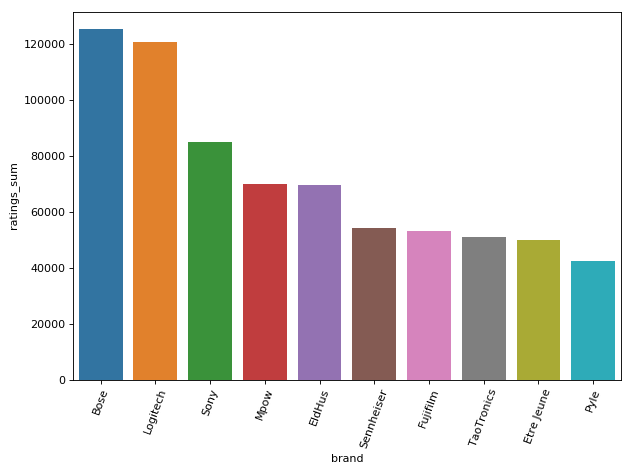

In [56]:
## Visualizing the above information
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
sns.barplot(top10.brand,top10.ratings_sum)
plt.xticks(rotation=70)
plt.tight_layout()